# Percentage of Instances

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
#import custom_plots
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import pickle

sns.set_context("talk")
#sns.set_style("whitegrid")

In [131]:
plot_folder = "./TPC-H-plots"
experiment_id = "Spark_Jobs" 


In [132]:
#percentage of different operators
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

with open(f'./data_plan_features_spark.pkl', "rb") as handle:
    data_plan_features = pickle.load(handle)
data_plan_features


id  varName         pact              tables  selectivity  \
plan_id  data_id                                                                
Job0v0   1GB       0.0  source0  Data Source          [lineitem]          1.0   
         1GB       1.0     map1          Map          [lineitem]          1.0   
         1GB       2.0     map2          Map          [lineitem]          1.0   
         1GB       3.0     map3          Map          [lineitem]          1.0   
         1GB       4.0     map4          Map          [lineitem]          1.0   
...                ...      ...          ...                 ...          ...   
Job199v4 1GB       4.0     map4          Map          [supplier]          1.0   
         1GB       3.0    join3         Join  [nation, supplier]          NaN   
         1GB       8.0     map8          Map          [supplier]          1.0   
         1GB       9.0  reduce9       Reduce          [supplier]          NaN   
         1GB      10.0   sink10    Data Sink          [supplier]          NaN   

                  outCardinality  complexity  
plan_id  data_id                              
Job0v0   1GB          6001215.00         NaN  
         1GB          6001215.00         0.0  
         1GB          6001215.00         1.0  
         1GB          6001215.00         2.0  
         1GB          6001215.00         0.0  
...                          ...         ...  
Job199v4 1GB                0.75         1.0  
         1GB                1.00         NaN  
         1GB                1.00         2.0  
         1GB                1.00         NaN  
         1GB                1.00         NaN  

[11060 rows x 7 columns]

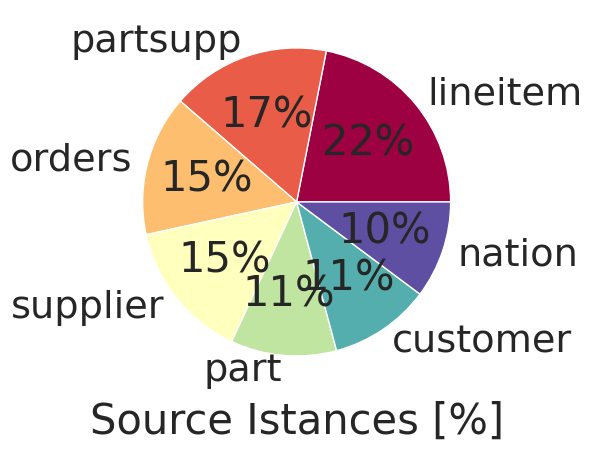

In [21]:
sns.set(font_scale=2.5)
d = data_plan_features.loc[data_plan_features.pact == "Data Source",:].tables.apply(lambda x:x[0]).value_counts()
d = d/d.sum()

fig, ax = plt.subplots(figsize=(5,5))
ax = d.plot(kind="pie", autopct='%.0f%%', cmap=cmap, ax=ax)
ax.set_ylabel("")
ax.set_xlabel("Source Istances [%]")

plt.savefig(f"{plot_folder}/{experiment_id}_data_plan_source.pdf", bbox_inches="tight")
plt.show()
plt.close()

(0.0, 0.1]   NaN
(0.1, 0.2]   NaN
(0.2, 0.3]   NaN
(0.3, 0.4]   NaN
(0.4, 0.5]   NaN
(0.5, 0.6]   NaN
(0.6, 0.7]   NaN
(0.7, 0.8]   NaN
(0.8, 0.9]   NaN
(0.9, 1.0]   NaN
Name: selectivity, dtype: float64


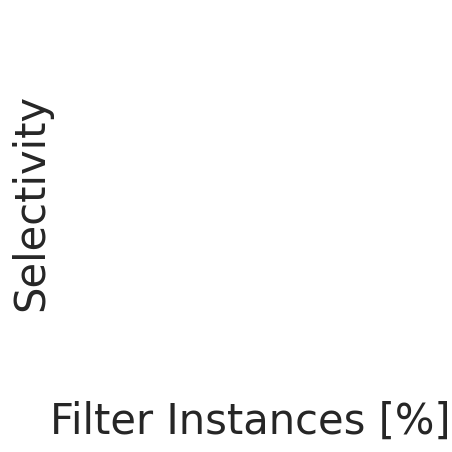

In [22]:
d = data_plan_features.loc[data_plan_features.pact == "Filter",:].selectivity.sort_values()#.plot(kind="bar")


fig, ax = plt.subplots(figsize=(5,5))

d_hist = pd.cut(d, bins=np.arange(0,1.1, 0.1)).value_counts()
d_hist = d_hist.sort_index() / d_hist.sum()
print(d_hist)
d_hist = d_hist[d_hist>0]
d_hist.plot(kind="pie",  autopct='%.0f%%', cmap=cmap, ax=ax, startangle=45)
ax.set_xlabel("Filter Instances [%]")
ax.set_ylabel("Selectivity")
plt.grid(True)


plt.savefig(f"{plot_folder}/{experiment_id}_data_plan_filter.pdf", bbox_inches="tight")
plt.show()
plt.close()

$O(1)$      0.402764
$O(f)$      0.332675
$O(f^2)$    0.264561
Name: complexity, dtype: float64


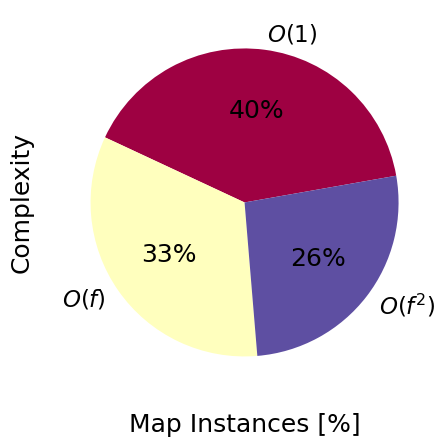

In [135]:
d = data_plan_features.loc[data_plan_features.pact == "Map",:].complexity.sort_values()
mappings = {0.0:"$O(1)$", 1.0:"$O(f)$", 2.0:"$O(f^2)$"}
d = d.apply(lambda v: mappings[v])

d_hist = d.value_counts() #pd.cut(d, bins=np.arange(0,1.1, 0.1)).value_counts()
d_hist = d_hist.sort_index() / d_hist.sum()
print(d_hist)
d_hist = d_hist[d_hist>0]

fig, ax = plt.subplots(figsize=(5,5))
d_hist.plot(kind="pie",  autopct='%.0f%%', cmap=cmap, ax=ax, startangle=10)
ax.set_xlabel("Map Instances [%]")
ax.set_ylabel("Complexity")
plt.grid(True)

plt.savefig(f"{plot_folder}/{experiment_id}_data_plan_map.pdf", bbox_inches="tight")
plt.show()
plt.close()

plan_id  data_id
Job0v0   1GB        2
Job0v1   1GB        2
Job0v2   1GB        2
Job0v3   1GB        2
Job0v4   1GB        2
                   ..
Job9v0   1GB        1
Job9v1   1GB        1
Job9v2   1GB        1
Job9v3   1GB        1
Job9v4   1GB        1
Length: 1000, dtype: int64


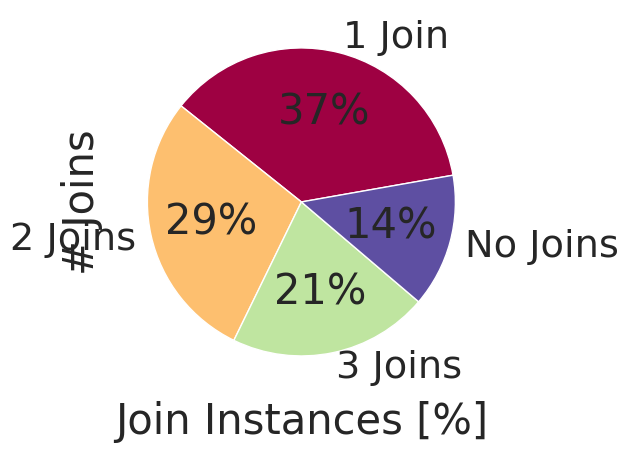

In [24]:
sns.set(font_scale=2.5)
d = data_plan_features.groupby(level=[0,1]).apply(lambda g: len(g[g["pact"]=="Join"]))#.size()
print(d)
mapping={
    0:"No Joins",
    1:"1 Join",
    2:"2 Joins",
    3:"3 Joins",
}
d = d.apply(lambda v: mapping[v])
d = d.value_counts()/d.value_counts().sum()

fig, ax = plt.subplots(figsize=(5,5))
d.plot(kind="pie",  autopct='%.0f%%', cmap=cmap, ax=ax, startangle=10)
ax.set_xlabel("Join Instances [%]")
ax.set_ylabel("# Joins")
plt.grid(True)

plt.savefig(f"{plot_folder}/{experiment_id}_data_plan_join.pdf", bbox_inches="tight")
plt.show()
plt.close()

# Predicted values and Ground Truth comparison

# R2 scores:

## Spark:

1GB:

R2 score real exec time:  0.16512780512839742

R2 score log exec time:  0.8755261263529843

NEW real exec time R2 without outliers: 0.8624394472426584

datafarm_time:  1630175.5074299998

all_time:  9878910.29335

improvement_factor:  6.06002865846284



5GB:

R2 score real exec time:  0.06740644836477339

R2 score log exec time:  0.8351358722744806

NEW real exec time R2 without outliers: 0.7487372153070296

datafarm_time:  4097951.9718400002

all_time:  44902526.81014

improvement_factor:  10.957309192176439


10GB:

R2 score real exec time:  0.21795049891024965

R2 score log exec time:  0.7569973705387754

NEW real exec time R2 without outliers: 0.7334530946475399

datafarm_time:  5721791.60816

all_time:  89922978.19547999

improvement_factor:  15.71587788468885


## SQL

1GB:

R2 score real exec time:  0.017477514318020804

R2 score log exec time:  0.7066251225161098

NEW real exec time R2 without outliers: 0.1408200536384896

datafarm_time:  725265.47

all_time:  3987772.8070000005

improvement_factor:  5.498362974594669

5GB:

R2 score real exec time:  0.0098738349623676

R2 score log exec time:  0.7343676522028375

NEW real exec time R2 without outliers: 0.09221501968457768

datafarm_time:  3103431.01

all_time:  23882721.819

improvement_factor:  7.6955865112013555

10GB:

R2 score real exec time:  0.005371292414959039

R2 score log exec time:  0.7057556718228719

NEW real exec time R2 without outliers: 0.2606872351886038

datafarm_time:  17379933.229999997

all_time:  52049641.614999995

improvement_factor:  2.9948125189086245



## Data preparation

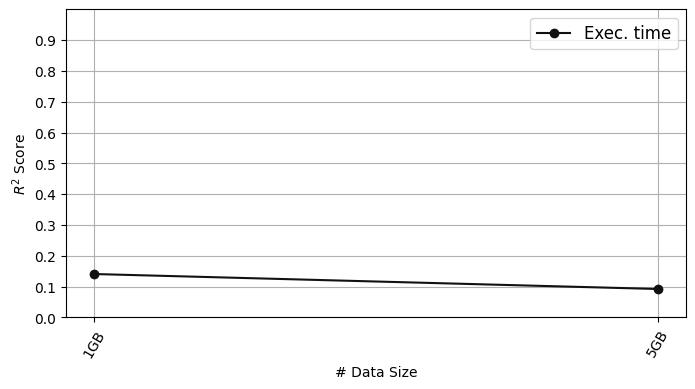

In [122]:
# SQL
log = [0.7066251225161098, 0.7343676522028375, 0.7057556718228719]
real = [0.017477514318020804, 0.0098738349623676, 0.005371292414959039]
outliers = [0.1408200536384896, 0.09221501968457768, 0.2606872351886038]


# SPARK
# log = [0.8755261263529843, 0.8351358722744806, 0.7569973705387754]
# real = [0.16512780512839742, 0.06740644836477339,  0.21795049891024965]
# outliers = [0.8624394472426584, 0.7487372153070296, 0.7334530946475399]
data_size = ['1GB', '5GB', '10GB']


plot_folder = "./TPC-H-plots"
experiment_id = "SQL"



ax = show_r2(log, real, outliers, data_size)
ax.legend(prop={'size': 12})
plt.grid(True)
plt.savefig(f"{plot_folder}/{experiment_id}_R2score.pdf", bbox_inches="tight")
plt.show()
plt.close()

/tmp/ipykernel_5465/738225144.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log_Ground Truth'] = filtered_df.apply(lambda row: math.log(row['Ground Truth']), axis=1)


Average Q-error: 1.1582907965634002 +- 0.1433318078455679
11.70016515570243
(619,)
NEW R2 without outliers: 0.26548617414474296


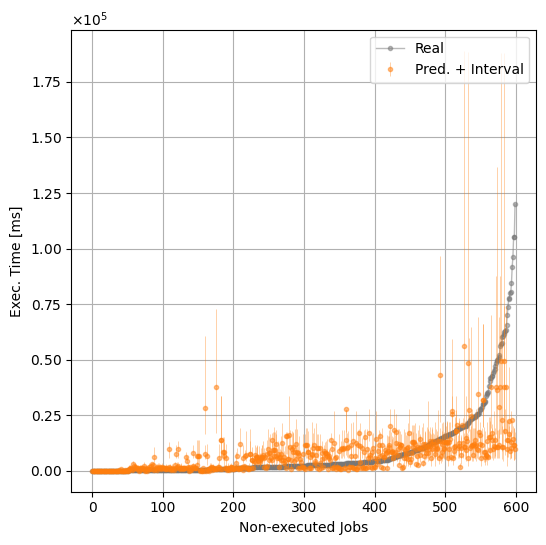

,plan_id,netRunTime,pred_Log_netRunTime,unc_low_Log_netRunTime,unc_up_Log_netRunTime,Ground Truth,pred_netRunTime,Log_Ground Truth
1,Job0v1,NaN,9.556103,9.407340,9.709652,10106.894,14130.669337,9.220973
3,Job0v3,NaN,6.923259,6.061317,7.773355,2811.821,1015.624771,7.941588
4,Job0v4,NaN,9.754864,9.306172,9.715337,6294.126,17237.874052,8.747372
5,Job100v0,NaN,9.299065,8.649072,10.092484,17574.713,10927.795240,9.774216
6,Job100v1,NaN,4.737572,4.228878,4.956852,511.600,114.156663,6.237543
7,Job100v2,NaN,6.992976,6.236119,7.786401,2418.312,1088.957150,7.790825
8,Job100v3,NaN,9.103031,8.640697,9.566082,17282.794,8982.479459,9.757467
10,Job101v0,NaN,2.559053,2.410939,2.675212,11.208,12.923576,2.416628
17,Job102v2,NaN,10.791531,9.727976,12.146359,21333.392,48607.392404,9.968029
18,Job102v3,NaN,9.165516,8.518283,9.831020,1671.936,9561.651522,7.421738


In [3]:
from IPython.display import display, HTML
import math
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 1000)

final_dataset = '/home/denis/IdeaProjects/data-farm/data/Experiment1/label_forecaster_20230119121217/final_dataset.csv'
ground_directory = '/home/denis/Desktop/DataFarm Experiments/SQL/5GB_with_selectivity'
counter = 0
list = []
for filename in os.listdir(ground_directory):
    f = os.path.join(ground_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        data = open(f, "r")
        try:
            d = json.load(data)
        except Exception as e:
            print(str(e), f)
        list.append({filename[:-6]: d["netRunTime"]})
        
result = {}
for d in list:
    result.update(d)
    
ground_df = pd.DataFrame({'plan_id': result.keys(), 'Ground Truth': result.values()})
    
df = pd.read_csv(final_dataset)


result_df = df[['plan_id', 'netRunTime', 'pred_Log_netRunTime', 'unc_low_Log_netRunTime', 'unc_up_Log_netRunTime']] 

joined_df = pd.merge(result_df, ground_df, on=['plan_id'])

joined_df['pred_netRunTime'] = joined_df.apply(lambda row: math.exp(row['pred_Log_netRunTime']), axis=1)




# improvement factor!

# datafarm_time = filtered_df['netRunTime'].sum()
# all_time = filtered_df['Ground Truth'].sum()

# print('datafarm_time: ', datafarm_time)
# print('all_time: ',all_time)

# improvement_factor = all_time/datafarm_time 


# print('improvement_factor: ',improvement_factor)






filtered_df = joined_df[(~np.isnan(joined_df['pred_Log_netRunTime'])) & (joined_df['Ground Truth'] > 0.0)]

filtered_df['Log_Ground Truth'] = filtered_df.apply(lambda row: math.log(row['Ground Truth']), axis=1)



# print("R2 score real exec time: ",r2_score(filtered_df['Ground Truth'], filtered_df['pred_netRunTime']))
# print("R2 score log exec time: ",r2_score(filtered_df['Log_Ground Truth'], filtered_df['pred_Log_netRunTime']))


# filtered_df

plot_folder = "./TPC-H-plots"
experiment_id = "SQL_Jobs_with_selectivity"
iteration_to_show = "5GB"

ax = show_iteration(filtered_df, exp=True, drop_outliers=True)
# np.argwhere(ax[0]<0)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText=True)
plt.grid(True)
plt.savefig(f"{plot_folder}/{experiment_id}_iter_{iteration_to_show}.pdf", bbox_inches="tight")
plt.show()
plt.close()

filtered_df


## Predicted and real labels plot blueprint

In [2]:
def show_iteration(results, exp=False, drop_outliers=False):
    y_test = results["Log_Ground Truth"].to_numpy()
    y_pred = results["pred_Log_netRunTime"].to_numpy()
    y_pred_lower = results["unc_low_Log_netRunTime"].to_numpy()
    y_pred_upper = results["unc_up_Log_netRunTime"].to_numpy()
    p = y_test.argsort()
            
    #print(y_pred)
    q_errors = np.maximum(y_test/y_pred, y_pred/y_test)
    print("Average Q-error:", np.mean(q_errors), "+-", np.std(q_errors))
        
    
    
    if drop_outliers:
        q = np.quantile(y_test, 0.97)
        print(q)
        out_mask = y_test < q
        print(out_mask.shape)
        y_test = y_test[out_mask]
        y_pred = y_pred[out_mask]
        y_pred_lower = y_pred_lower[out_mask]
        y_pred_upper = y_pred_upper[out_mask]
        p = y_test.argsort()

    
    fig, ax = plt.subplots(figsize=(6, 6))


    if exp:
        y_test = np.exp(y_test)
        y_pred = np.exp(y_pred)
        y_pred_lower = np.exp(y_pred_lower)
        y_pred_upper = np.exp(y_pred_upper)
        if drop_outliers:
            new_r2 = r2_score(y_test, y_pred)
            print("NEW R2 without outliers:", new_r2)
        
        
        #drop negative uncertanty intervals:

        yerr1 = np.array([y_pred[p] - y_pred_lower[p], y_pred_upper[p] -  y_pred[p]])
        yerr1[yerr1 < 0] = 0
        ax.plot(y_test[p], marker=".", linewidth=1, label="Real", color="#777777", alpha=0.5)
        ax.errorbar(np.arange(len(y_pred)), y_pred[p], yerr=yerr1, linewidth=0.5, fmt='.', color="#ff7f0e", label="Pred. + Interval", alpha=0.5)

        #ax.plot(np.arange(len(y_pred)), (y_pred_lower[p]+y_pred_upper[p])/2, marker=".", linewidth=0, label="smooth", color="green")

        ax.set_ylabel("Exec. Time [ms]")
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
        #ax.set_yscale("log")
        ax.set_xlabel("Non-executed Jobs")
        ax.legend()

    else:
        
        yerr1 = np.array([y_pred[p] - y_pred_lower[p], y_pred_upper[p] -  y_pred[p]])
        yerr1[yerr1 < 0] = 0
        
        ax.plot(y_test[p], marker=".", linewidth=1, label="Real", color="#777777", alpha=0.5)
        ax.errorbar(np.arange(len(y_pred)), y_pred[p], yerr=yerr1, linewidth=0.5, fmt='.', color="#ff7f0e", label="Pred. + Interval", alpha=0.5)
        ax.set_ylabel("Log(Exec. Time)")
        ax.set_xlabel("Non-executed Jobs")
        ax.legend()

    return ax


def show_r2(log,real,no_outliers_real, data_size):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    #ax.plot(log, marker="o", label="Log(Exec. time)", color="#777777")
    #ax.plot(real, marker="o", label="Exec. time", color="#111111")
    ax.plot(no_outliers_real, marker="o", label="Exec. time", color="#111111")

    ax.set_xticks(range(data_size.__len__()))
    ax.set_xticklabels(data_size, rotation=60)
    ax.set_ylim((0, 1))
    ax.set_yticks(np.arange(0, 1, 0.1))
    ax.set_xlabel("# Data Size")
    ax.set_ylabel("$R^2$ Score")
    #ax.legend()
    return ax

## Improvement factor plot blueprint

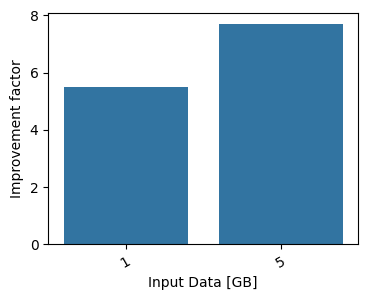

In [128]:
import seaborn as sns

colors = [sns.color_palette()[0], sns.color_palette()[0], sns.color_palette()[0], sns.color_palette()[0]]
# Set your custom color palette
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


imp_factors = [5.498362974594669, 7.6955865112013555]
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
ax = sns.barplot(x=[0,1], y=imp_factors, palette=sns.color_palette(colors))
# sns.regplot(x=[0,1,2,3,4], y=imp_factors, ax=ax, marker="", color="gray",  ci=None, line_kws={"linestyle":"--", "linewidth":0})
#sns.despine(offset=10, trim=False)
ax.set_ylabel("Improvement factor")
ax.set_xticks([0,1])
ax.set_xticklabels([1, 5], rotation=30)
ax.set_xlabel("Input Data [GB]")
plt.savefig(f"./SQL_improvement_factor_data_without10.pdf", bbox_inches="tight")
plt.show()
plt.close()
